In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [13]:
dataset = pd.read_csv("../datasets/emscad_v1.csv")

def duplicatedChecking(df):
    print("Number of duplicated rows detected",df.duplicated().sum())
    df.drop_duplicates(inplace=True)


duplicatedChecking(dataset)
#show some values for the dataset

# convert stringified t and f to boolean
dataset['fraudulent'] = dataset['fraudulent'].map({'t': True, 'f': False})
dataset['telecommuting'] = dataset['telecommuting'].map({'t': True, 'f': False})
dataset['has_company_logo'] = dataset['has_company_logo'].map({'t': True, 'f': False})
dataset['has_questions'] = dataset['has_questions'].map({'t': True, 'f': False})
dataset['in_balanced_dataset'] = dataset['in_balanced_dataset'].map({'t': True, 'f': False})

dataset.to_csv("../datasets/emscad_v2.csv", index=False)

Number of duplicated rows detected 235


In [14]:
dataset = pd.read_csv("../datasets/emscad_v2.csv")

dataset.head(10)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,False,True,False,Other,Internship,NaN,NaN,Marketing,False,False
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,False,True,False,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,False,False
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,False,True,False,NaN,NaN,NaN,NaN,NaN,False,False
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,False,True,False,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,False,False
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,False,True,True,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,False,False
5,Accounting Clerk,"US, MD,",NaN,NaN,NaN,<p><b>Job Overview</b></p>\r\n<p>Apex is an en...,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"<p>Founded in 2009, the <b>Fonpit AG</b> rose ...",<p><b>Your Responsibilities:</b></p>\r\n<p> </...,<p><b>Your Know-How:</b></p>\r\n<p><b> ...,<p><b>Your Benefits:</b></p>\r\n<p> </p>\r\n<u...,False,True,True,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,False,False
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,<p>Airenvy’s mission is to provide lucrative y...,<h3>Who is Airenvy?</h3>\r\n<p>Hey there! We a...,"<ul>\r\n<li>Experience with CRM software, live...",<p><b>Competitive Pay.</b> You'll be able to e...,False,True,True,NaN,NaN,NaN,NaN,NaN,False,False
8,HP BSM SME,"US, FL, Pensacola",NaN,NaN,<p>Solutions3 is a <b>woman-owned small busine...,<p></p>\r\n<p></p>\r\n<p>Implementation/Config...,<p><b>MUST BE A US CITIZEN.</b></p>\r\n<p><b>A...,NaN,False,True,True,Full-time,Associate,NaN,Information Technology and Services,NaN,False,False
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"<p>Novitex Enterprise Solutions, formerly Pitn...",<p>The Customer Service Associate will be base...,<p><b>Minimum Requirements:</b></p>\r\n<ul>\r\...,NaN,False,True,False,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,False,False


fraudulent                           False  True  total  percent Fraud  \
industry                                                                 
Retail                                 218     5    223       2.242152   
Telecommunications                     303    26    329       7.902736   
Consumer Services                      324    24    348       6.896552   
Hospital & Health Care                 436    50    486      10.288066   
Financial Services                     718    35    753       4.648074   
Education Management                   819     0    819       0.000000   
Marketing and Advertising              776    45    821       5.481121   
Internet                              1057     0   1057       0.000000   
Computer Software                     1363     5   1368       0.365497   
Information Technology and Services   1680    32   1712       1.869159   

fraudulent                           Fraudulent  Non-Fraudulent  
industry                                     

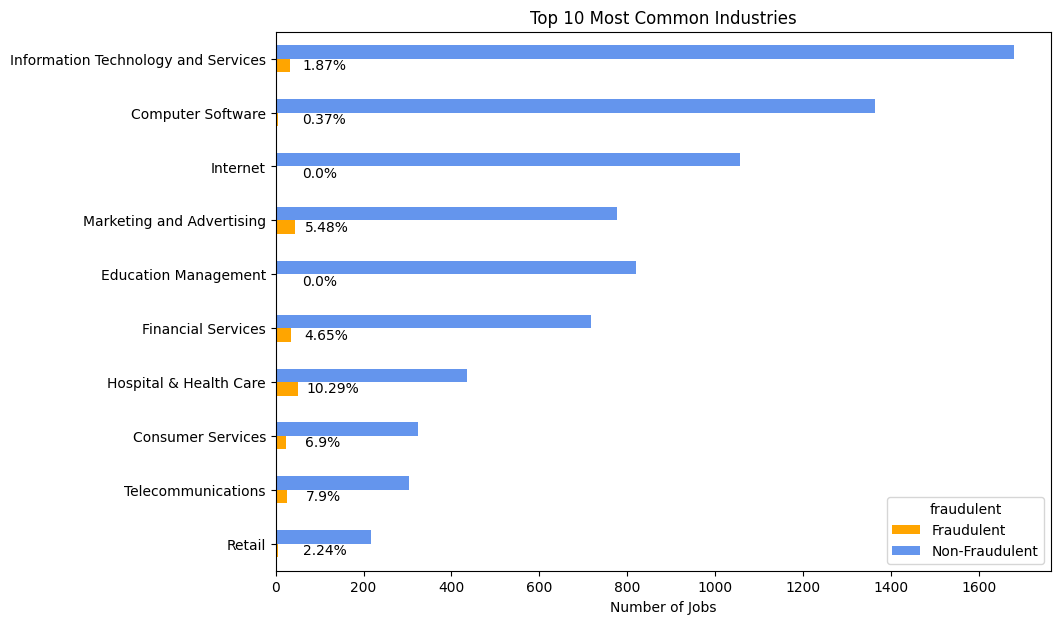

In [76]:
# count the number of data with false in the fraudulent column
print("Number of non-fraudulent data", dataset['fraudulent'].value_counts())
dataset = pd.read_csv("../datasets/emscad_v2.csv")

# # create a bargraph showing the top 10 industries and differentiate between fraudulent and non-fraudulent
top_10_industries = (dataset['industry'].value_counts()).iloc[:5]
#  split top 10 industries into fraudulent and non-fraudulent
top_10_industries_fraudulent = dataset[dataset['fraudulent'] == True]['industry'].value_counts().iloc[:5]
top_10_industries_non_fraudulent = dataset[dataset['fraudulent'] == False]['industry'].value_counts().iloc[:5]


df2 = dataset.groupby(['industry', 'fraudulent']).size().unstack(fill_value=0).sort_values(by=[False], ascending=False).head(10)
# sort df2 total count of non-fraudulent and fraudulent jobs
df2['total'] = df2[True] + df2[False]
df2['percent Fraud'] = df2[True] / (df2[True] + df2[False]) * 100
df2['Fraudulent'] = df2[True]
df2['Non-Fraudulent'] = df2[False]
df2.sort_values(by='total', inplace=True)
print(df2)

plot = df2[['Non-Fraudulent', 'Fraudulent']].plot(kind='barh', y=['Fraudulent', 'Non-Fraudulent'], stacked=False, figsize=(10, 7), title='Top 10 Most Common Industries', color=['orange', 'cornflowerblue'])
# now display the percent fraud on the graph
for index, value in enumerate(df2['percent Fraud']):
    plot.text(value + 60, index - 0.2, str(round(value, 2)) + '%') 
    plot.set_xlabel("Number of Jobs")
    plot.set_ylabel("")



fraudulent                    False  True  total  percent Fraud  Fraudulent  \
industry                                                                      
Oil & Energy                    178   108    286      37.762238         108   
Accounting                      102    57    159      35.849057          57   
Real Estate                     143    24    167      14.371257          24   
Health, Wellness and Fitness    108    15    123      12.195122          15   
Hospital & Health Care          436    50    486      10.288066          50   
Telecommunications              303    26    329       7.902736          26   
Consumer Services               324    24    348       6.896552          24   
Staffing and Recruiting         119     8    127       6.299213           8   
Human Resources                  98     6    104       5.769231           6   
Marketing and Advertising       776    45    821       5.481121          45   

fraudulent                    Non-Fraudulent  
indu

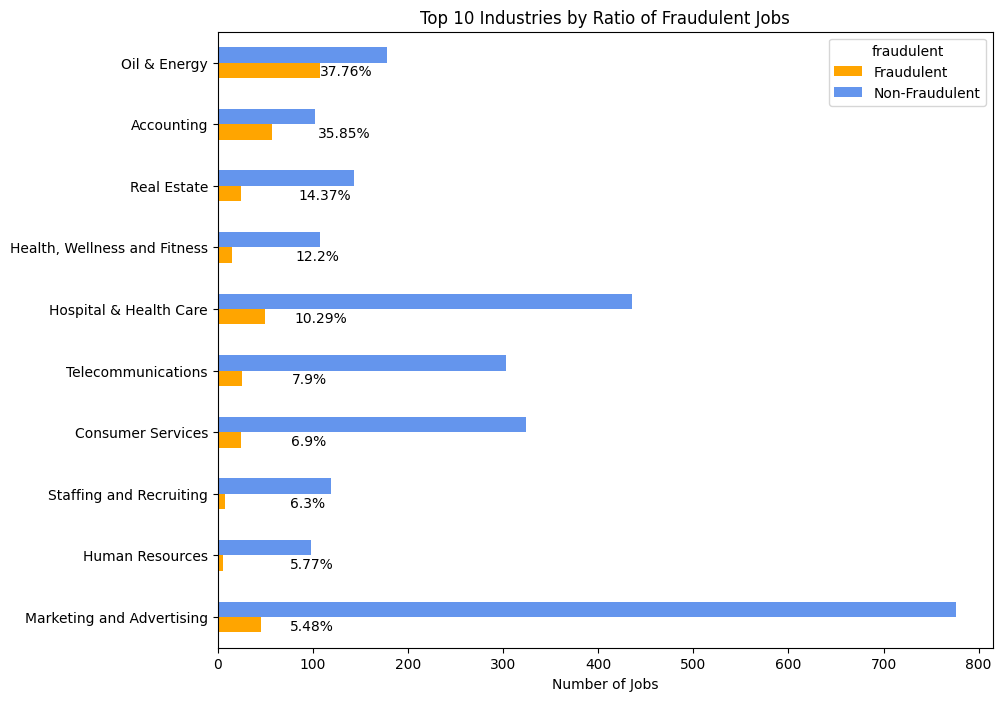

In [77]:
dataset = pd.read_csv("../datasets/emscad_v2.csv")

df2 = dataset.groupby(['industry', 'fraudulent']).size().unstack(fill_value=0).sort_values(by=[True], ascending=False)
df2['total'] = df2[True] + df2[False]
df2['percent Fraud'] = df2[True] / (df2[True] + df2[False]) * 100
df2['Fraudulent'] = df2[True]
df2['Non-Fraudulent'] = df2[False]
df2.sort_values(by='percent Fraud', ascending=False, inplace=True)
df2 = df2[df2['total'] > 100].head(10)
print(df2)

# reverse the order of df2
df2 = df2.iloc[::-1]

plot = df2[['Non-Fraudulent', 'Fraudulent']].plot(kind='barh', y=['Fraudulent', 'Non-Fraudulent'],stacked=False, figsize=(10, 8), title='Top 10 Industries by Ratio of Fraudulent Jobs', color=['orange', 'cornflowerblue'])
for index, value in enumerate(df2['percent Fraud']):
    plot.text(value + 70, index - 0.15, str(round(value, 2)) + '%', ha = 'left', va='center', ) 
    plot.set_xlabel("Number of Jobs")
    plot.set_ylabel("")